# <font color=brown><center>Analysis on USA Housing Dataset - Implementation of Regression</center></font>

# <font color=purple>Importing the Dependencies</font>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# <font color=purple>Importing Dataset</font>

In [ ]:
#loading the USA_Housing dataset from csv file to pandas dataframe
data=pd.read_csv('/content/drive/MyDrive/Project/USA_Housing.csv')

# <font color=purple>Introductory Details About Data</font>

In [ ]:
#printing first five records of dataset
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
#printing last five records of the dataset
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [ ]:
#printing all the columns in the dataset
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
#checking duplicated records in dataset
data.duplicated().sum()

0

In [ ]:
#total number of rows and columns in dataset
data.shape

(5000, 7)

### **Observation**<br>- Dataset comprises 5000 observation and 7 features.<br>- Out of 7, one is Target variable and rest 6 is input variable.

In [ ]:
#Statistics Summary
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# <font color=purple>Handling Missing Data</font>

In [ ]:
#checking missing values
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# <font color=purple>Visualizing Missing Values</font>

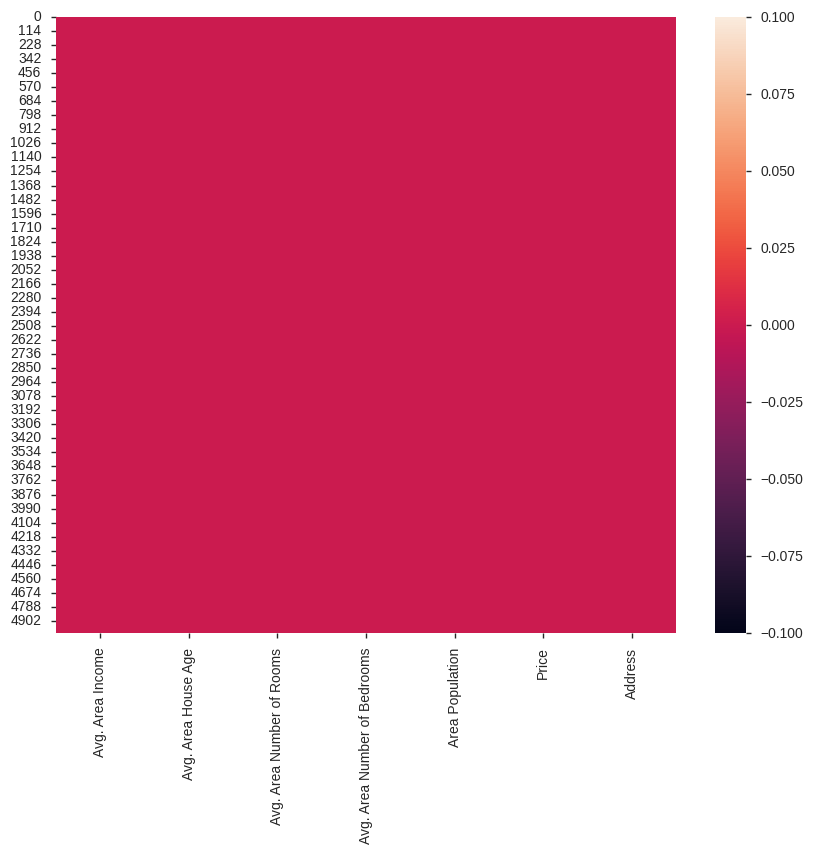

In [ ]:
#visualizing missing value
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())
plt.show()

### **Observation**<br>- We see all the columns of the dataset are free from null values.

In [ ]:
#checking datatypes of each columns
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

### **Observation**<br>- We see dataset consist of numerical as well as categorical columns, so need to convert categorical into numerical.

# <font color=purple>Encoding Categorical Data</font>

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Converting all Categorical data into Numerical data
le=LabelEncoder() #create object of LabelEncoder class
data['Address']=le.fit_transform(data['Address'])
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,962
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,863
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,4069
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,4794
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,4736


# <font color=purple>Visualizing Correlation</font>

In [ ]:
X=data.drop('Price',axis=1)

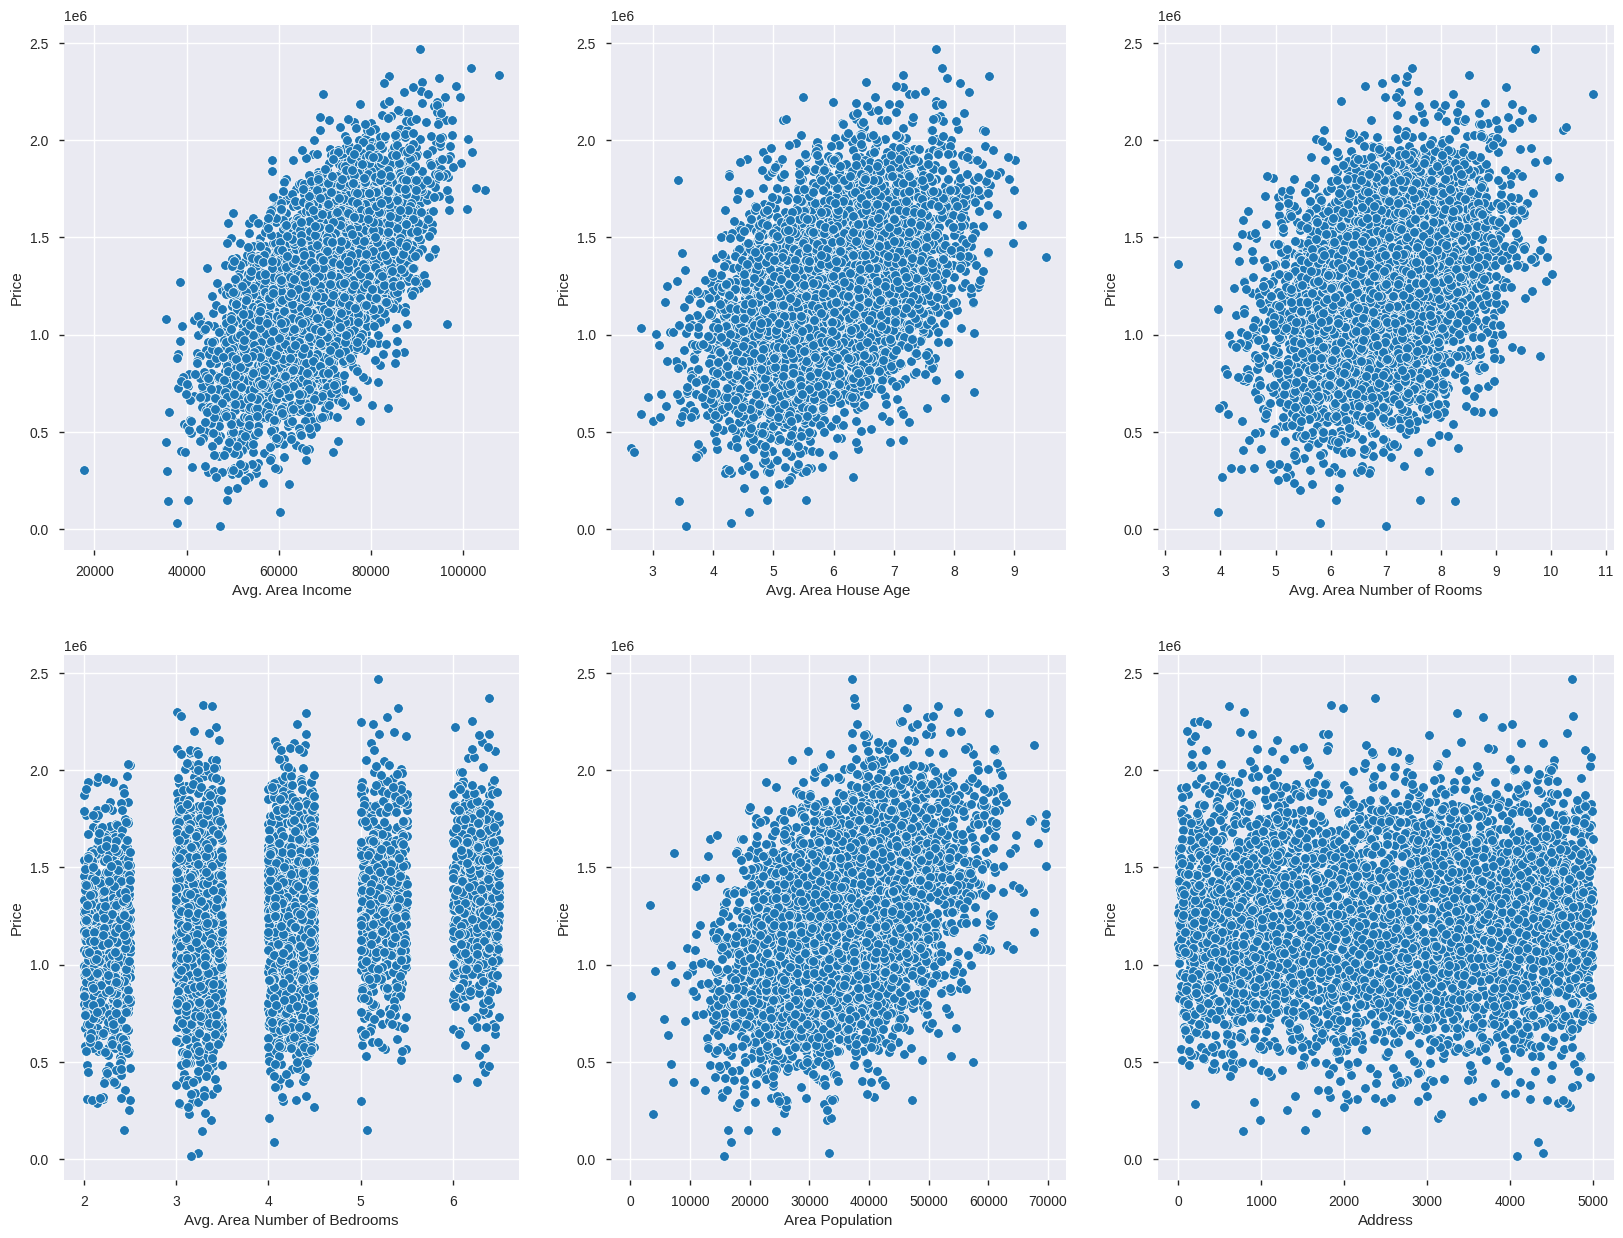

In [ ]:
Y=data["Price"]
plt.figure(figsize=(20,15))
for i,col in enumerate(X):
  plt.subplot(2,3,i+1)
  sns.scatterplot(data[col],Y)
plt.show()

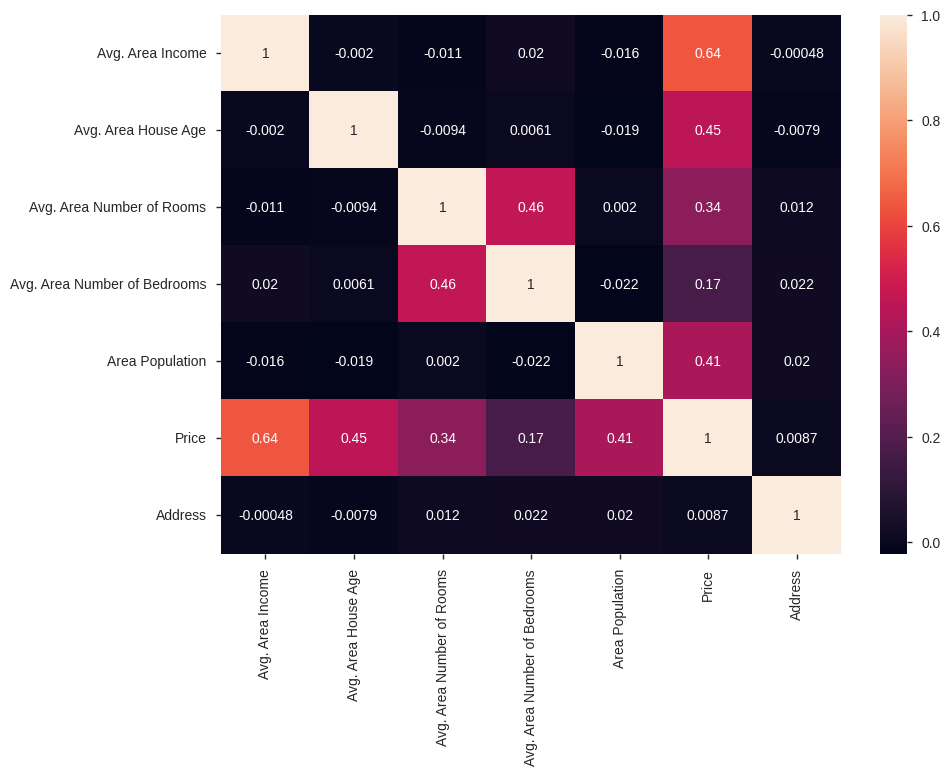

In [ ]:
#heatmap for correlation
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

### **Observation**<br>- From the Scatterplot and the heatmap, the variable Avg. Area Income seems to be most correlated with Price followed by Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Address'.<br>- Avg. Area Number of Bedrooms has least correlated with Price.

# **Performing Model using Multiple Linear Regression**

# <font color=purple>Splitting Dependent and Independent Features</font>

In [ ]:
X=data.drop('Price',axis=1) #input
Y=data['Price'] #output


In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,962
1,79248.642455,6.002900,6.730821,3.09,40173.072174,863
2,61287.067179,5.865890,8.512727,5.13,36882.159400,4069
3,63345.240046,7.188236,5.586729,3.26,34310.242831,4794
4,59982.197226,5.040555,7.839388,4.23,26354.109472,4736


In [ ]:
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

# <font color=purple>Splitting into test and training set</font>

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# <font color=purple>Feature Scaling using StandardScaler</font>

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #on training data
X_test=ss.transform(X_test) #on testing data

# <font color=purple>Training on training set</font>

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

# <font color=purple>Slope & Intercept of Line</font>

In [ ]:
m=lr.coef_
print("Slope : ",m)
c=lr.intercept_
print("Intercept : ",c)

Slope :  [2.29020766e+05 1.65104891e+05 1.21092912e+05 2.39285678e+03
 1.50799081e+05 1.04418297e+02]
Intercept :  1232402.8065984936


# <font color=purple>Prediction on test set</font>

In [ ]:
Y_pred=lr.predict(X_test) 
Y_pred

array([1555170.75972431, 1583286.21244991,  941637.53262411, ...,
       1099705.61868749,  974874.37439446, 1731209.12597026])

# <font color=purple>Evaluating the performance of Model</font>

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error : ",round(mse,2))
rmse=np.sqrt(mse)
print("Root Mean Squared Error : ",round(rmse,2))
r2=r2_score(Y_test,Y_pred)
print("R2 score : ",r2)

Mean Squared Error :  10567511384.15
Root Mean Squared Error :  102798.4
R2 score :  0.9166907319642554


## **Observation**<br>- Here R2 Score is best as it is nearest to +1

# **Performing Assumption of Linear Regression**

## <font color=purple> Assumption -  Check for Multicollinearity</font>

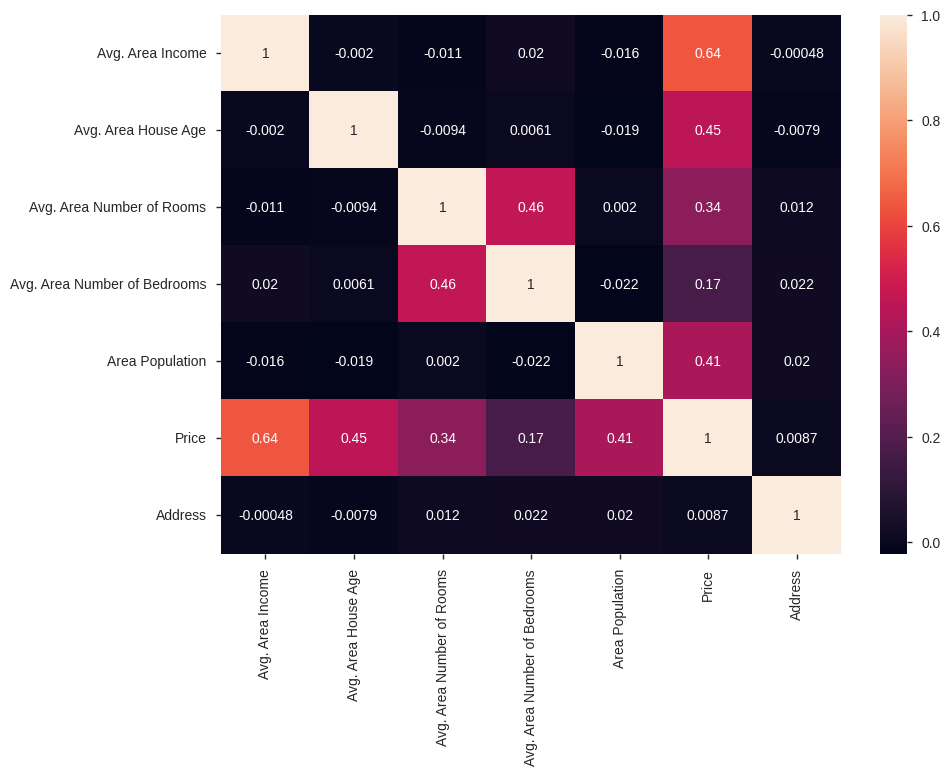

In [ ]:
#plotting Heatmap for checking the correlation between inputs
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

### **Observatiom**<br> - There is relatively high positive correlation between Avg. Area Number of Rooms and Avg. Area Number of Bedrooms, means Avg. Area Number of Rooms and Avg. Area Number of Bedrooms have Multicollinearity.<br>- From Output Price and input Avg. Area Number of Rooms has 0.34 and Avg. Area Number of Bedrooms has 0.17 relation.<br>- So we will remove Avg. Area Number of Bedrooms as it has less relation

# <font color=purple>Splitting Dependent and Independent Features</font>

In [ ]:
X=data.drop(['Price','Avg. Area Number of Bedrooms'],axis=1) #input
Y=data['Price'] #output

In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Address
0,79545.458574,5.682861,7.009188,23086.800503,962
1,79248.642455,6.002900,6.730821,40173.072174,863
2,61287.067179,5.865890,8.512727,36882.159400,4069
3,63345.240046,7.188236,5.586729,34310.242831,4794
4,59982.197226,5.040555,7.839388,26354.109472,4736


In [ ]:
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

# <font color=purple>Splitting into test and training set</font>

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1) 

# <font color=purple>Feature Scaling using StandardScaler</font>

In [ ]:
X_train=ss.fit_transform(X_train) #on training data
X_test=ss.transform(X_test) #on testing data

# <font color=purple>Training on training set</font>

In [ ]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

# <font color=purple>Slope & Intercept of Line</font>

In [ ]:
m=lr.coef_
print("Slope : ",m)
c=lr.intercept_
print("Intercept : ",c)

Slope :  [2.29077529e+05 1.65112567e+05 1.22190218e+05 1.50722349e+05
 1.44525496e+02]
Intercept :  1232402.8065984936


# <font color=purple>Prediction on test set</font>

In [ ]:
Y_pred=lr.predict(X_test) #Y_predict = M*X+C
Y_pred

array([1554516.24968439, 1584700.26403879,  939249.10116569, ...,
       1101651.21261242,  977738.98184296, 1728901.09013123])

# <font color=purple>Evaluating the performance of Model</font>

In [ ]:
mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error : ",round(mse,2))
rmse=np.sqrt(mse)
print("Root Mean Squared Error : ",round(rmse,2))
r2=r2_score(Y_test,Y_pred)
print("R2 score : ",r2)

Mean Squared Error :  10567401786.95
Root Mean Squared Error :  102797.87
R2 score :  0.9166915959768016


### **Observation**<br>- After removing the Multicollinearty, R2 score is 0.9166915959768016

## <font color=purple> Assumption - Linearity of Residuals</font>

In [ ]:
#checking residual
residual = Y_test-Y_pred

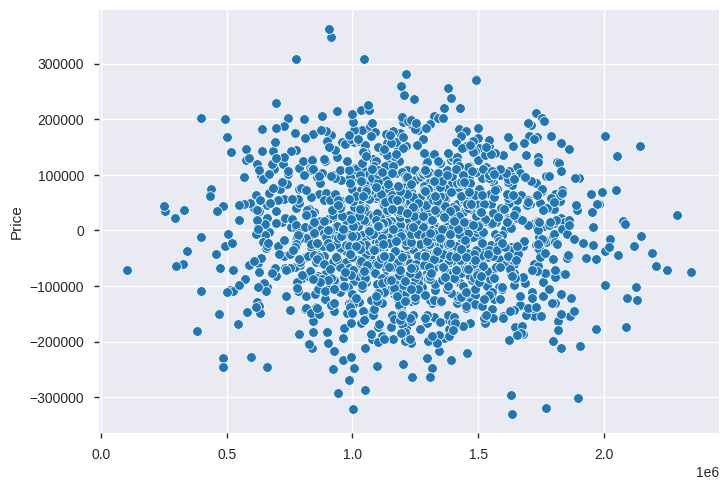

In [ ]:
#visualizing Scatter Plot between Y_pred and residual
sns.scatterplot(Y_pred,residual)
plt.show()

### **Observation**<br>- Linearity of Residual satisfied, as there is linear Relationship between independent and dependent variable.

## <font color=purple> Assumption - Homoscedasticity</font>

### **Observation**<br>- From above graph, we can see that Assumption of Linearity of Residual satisfied and variance of residual are constant across independent variable, therefore assumption of Homoscedastity also satisfied.

## <font color=purple> Assumption - Normality of Residual</font>

Residual Skewness :  0.01300840029621651


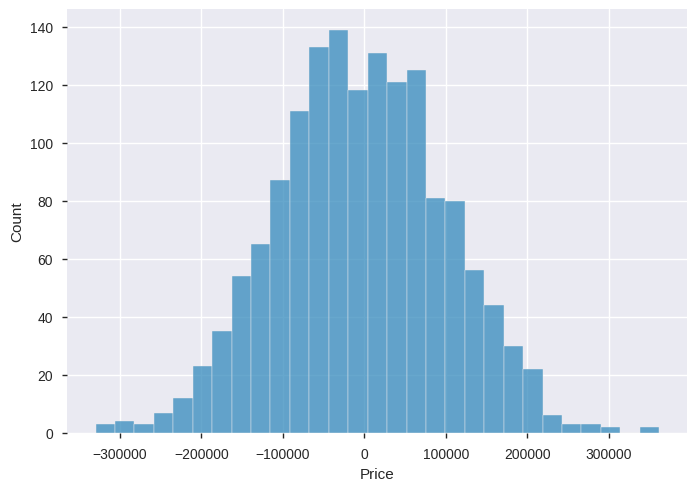

In [ ]:
sns.histplot(residual)
plt.show()

#check skewness
print("Residual Skewness : ", residual.skew())


### **Observation**<br>- From the above,we can see that residuals are normally distributed, means assumption of Normality of Residual satified.

# We have successfully Fulfilled all the Assumption of Linear Regression